# Breast Cancer Diagnosis using Machine Learning

## 1. Background

### 1.1 Dataset

The breast cancer dataset is a widely recognized and frequently used dataset in the field of machine learning and medical research. It is included in the scikit-learn library, a popular Python library for machine learning tasks. The dataset provides valuable information extracted from digitized images of fine needle aspirates (FNA) of breast masses, aiding in the diagnosis and classification of breast cancer tumors.

Comprising a total of 569 instances, this dataset offers a rich collection of features that describe various characteristics of cell nuclei present in the breast images. These features have been carefully computed from the images and encompass essential attributes such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

For each instance, 30 numeric features are available, providing insights into the nature and composition of the breast mass. These features are further categorized into three groups: mean, standard error, and worst, representing the mean value, standard error value, and the worst (mean of the three largest values) value of each attribute, respectively.

Accompanying the comprehensive feature set, the breast cancer dataset also includes a binary target variable. This target variable serves as the ground truth for classification tasks, with a value of 0 indicating a benign tumor and a value of 1 indicating a malignant tumor.

The breast cancer dataset serves as a valuable resource for researchers, data scientists, and medical professionals aiming to develop robust machine learning models for breast cancer diagnosis. It enables the exploration of various classification algorithms, feature selection techniques, and model evaluation strategies, fostering advancements in the field of medical diagnostics and contributing to the early detection and treatment of breast cancer.

### 1.2 Introduction

Objective: The objective of this project is to develop a machine learning model that can accurately classify breast tumors as benign or malignant based on the provided dataset. By leveraging the breast cancer dataset from the sklearn.datasets module, we aim to create a predictive model that can assist in the early detection and diagnosis of breast cancer.

## 2. Preparation

In this section, y
1. Load the breast cancer dataset using the sklearn.datasets module.
2. Understand the structure and characteristics of the dataset.
3. Explore the features and their distributions.

### 1.1 Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns

plt.style.use('ggplot')

### 1.2 Load Dataset

In [3]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Access the features (X) and target variable (y)
X = data.data
y = data.target

In [5]:
# Print the shape of the dataset
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (569, 30)
Shape of y: (569,)


In [8]:
print(data.feature_names)
print()
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

['malignant' 'benign']


### 1.3 Dataframe Creation

In [9]:
# Create a dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the dataframe
df['target'] = data.target

# Print the first few rows of the dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


The breast cancer dataset from scikit-learn contains information about various features computed from digitized images of breast mass aspirates. Here's some information about the dataset:

1. Number of Instances: 569
2. Number of Features: 30 (including the target variable)
The features in the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features are computed from the images and describe various characteristics of the cell nuclei present in the image. The features include:

1. Mean radius
2. Mean texture
3. Mean perimeter
4. Mean area
5. Mean smoothness
6. Mean compactness
7. Mean concavity
8. Mean concave points
9. Mean symmetry
10. Mean fractal dimension
For each of these ten features, three measures are available: mean, standard error, and "worst" or largest (mean of the three largest values). This results in a total of 30 features.

The target variable in the dataset represents the class label and indicates whether the breast mass is classified as malignant (cancerous) or benign (non-cancerous). The target variable has two classes:

0: Benign
1: Malignant

## 2. Data Exploration

### 2.1 Distribution of Benign and Malignant Breast Cancer Cases.

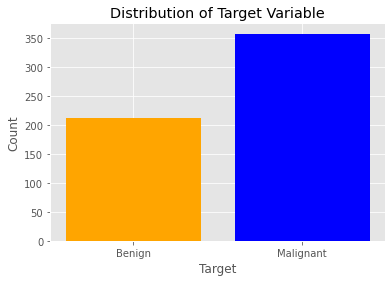

In [15]:
# Count the occurrences of each target value
target_counts = df['target'].value_counts()

# Define the colors for the bars
colors = ['blue', 'orange']

# Create a bar plot with custom colors
plt.bar(target_counts.index, target_counts.values, color=colors)

plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title('Distribution of Target Variable')

plt.show()

### 2.2 Relationship Between Selected Features and Target Variable (Benign vs. Malignant).

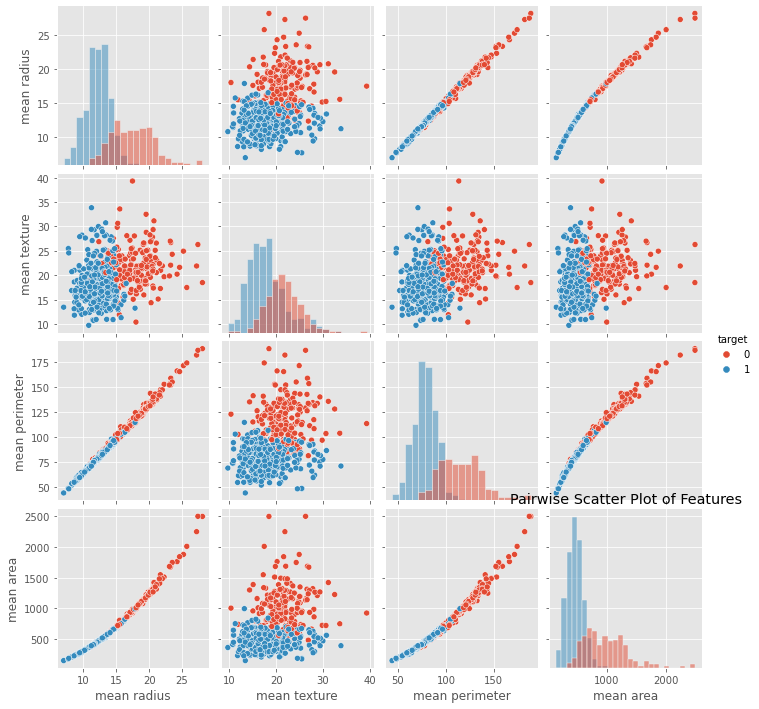

In [18]:
# Select a subset of features for visualization
subset_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']

# Create a pairwise scatter plot
sns.pairplot(df[subset_features], hue='target', diag_kind='hist')
plt.title('Pairwise Scatter Plot of Features')
plt.show()

## 3. Data Cleaning

### 3.1 Checking for Missing Values

In [19]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### 3.2 Checking for outliers in our dataset

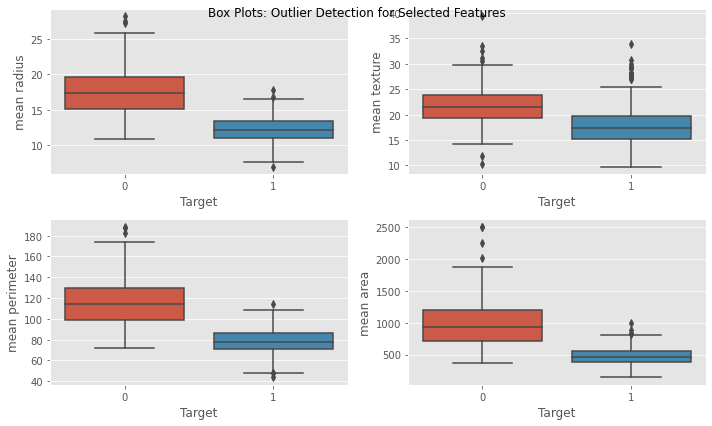

In [20]:
# Select a subset of features for visualization
subset_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

# Create box plots for each feature
plt.figure(figsize=(10, 6))
for i, feature in enumerate(subset_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.xlabel('Target')
    plt.ylabel(feature)

plt.tight_layout()
plt.suptitle('Box Plots: Outlier Detection for Selected Features')
plt.show()

The dataset does not contain any missing values, eliminating the need for imputation or handling of missing data. As outliers can provide valuable insights into the data, we have decided not to remove them. Retaining outliers allows us to capture extreme or unique observations that may contribute to a comprehensive analysis, providing a more accurate representation of the breast cancer dataset.

## 4. Feature Correlation

### 4.1 Finding the correlation between features

In [21]:
featureMeans = list(df.columns[1:11])

/Users/brucehaoyuli/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


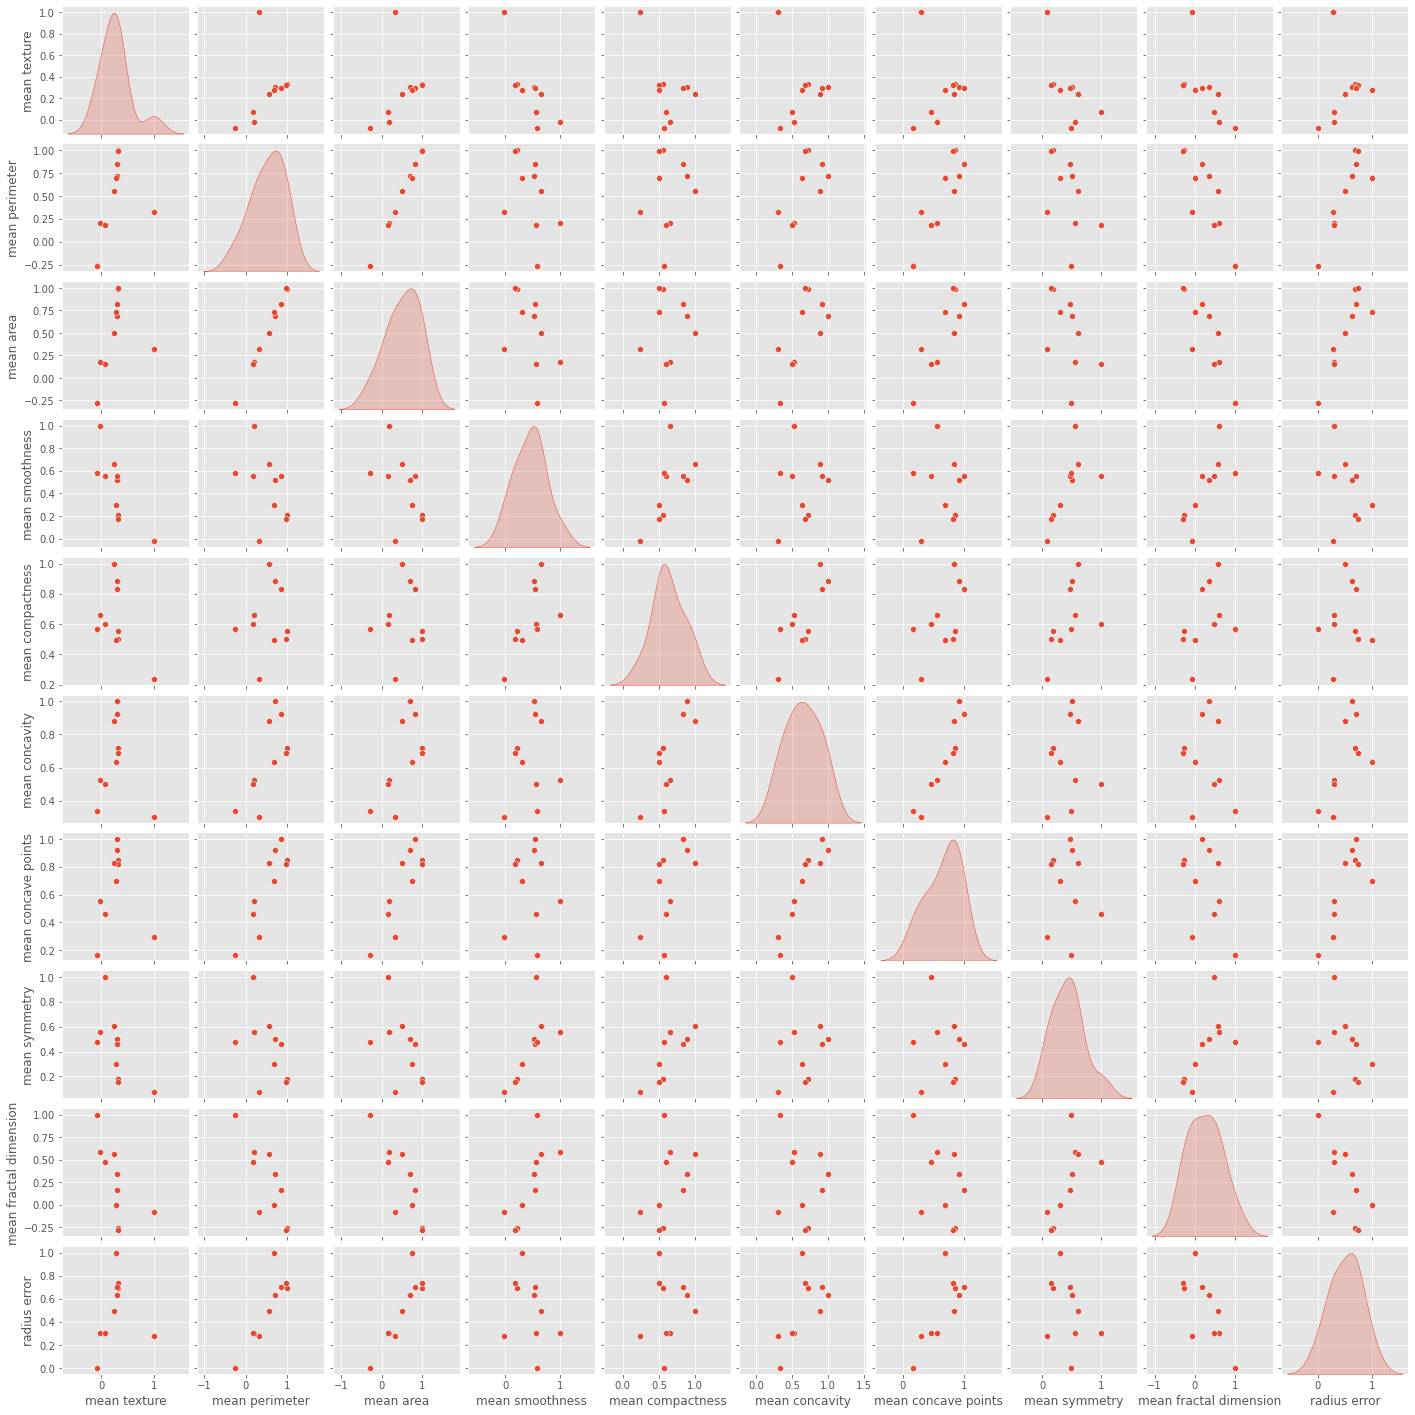

In [22]:
import seaborn as sns
correlationData = df[featureMeans].corr()
sns.pairplot(df[featureMeans].corr(), diag_kind='kde', size=2);

### 4.2 Heatmap

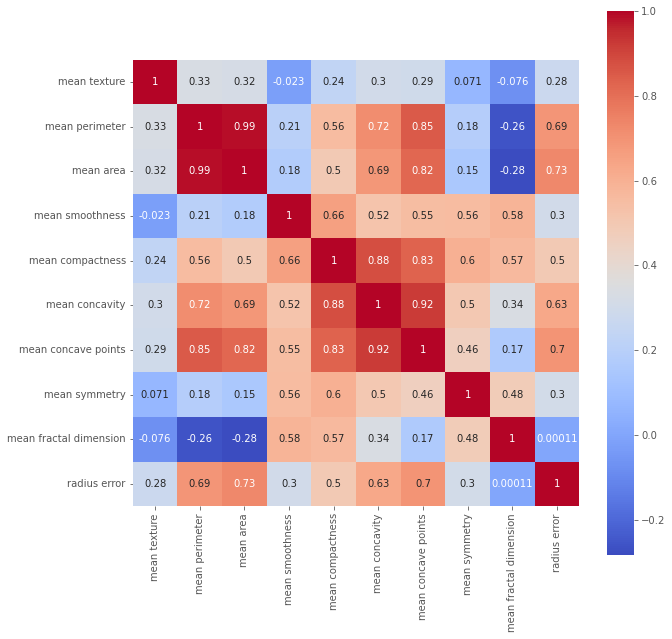

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

## 5. Data Encoding

No data encoding is required for the breast cancer dataset as it already contains numeric features and the target variable is represented by integers.

## 6. Model Performance Comparison - Preparation

### 6.1 Division of Dataset into Target and Training Data

In [25]:
# Split the data into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

### 6.2 Standardisation of the Data

In [ ]:
# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 6.3 Train-Test-Split

In [27]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Model Performance Comparison

### 7.1 Decision Tree

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate the accuracy of the model
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)

Accuracy: 0.9473684210526315


### 7.2 Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the model to the standardized training data
rf.fit(X_train, y_train)

# Make predictions on the standardized test set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.9649122807017544


### 7.3 Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC()

# Fit the model to the standardized training data
svm.fit(X_train, y_train)

# Make predictions on the standardized test set
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.9473684210526315


### 7.4 K-Nearest Neighbours (KNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier()

# Fit the model to the standardized training data
knn.fit(X_train, y_train)

# Make predictions on the standardized test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)

Accuracy: 0.956140350877193


### 7.5 Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
nb = GaussianNB()

# Fit the model to the standardized training data
nb.fit(X_train, y_train)

# Make predictions on the standardized test set
y_pred = nb.predict(X_test)

# Calculate the accuracy of the model
nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_accuracy)

Accuracy: 0.9736842105263158


## 8. Result Dataframe

### 8.1 Accuracy Comparison


In [39]:
finalleaderboard = {
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'Support Vector Machine': svm_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Naive Bayes': nb_accuracy,
}

finalleaderboard = pd.DataFrame.from_dict(finalleaderboard, orient='index', columns=['Accuracy'])
finalleaderboard = finalleaderboard.sort_values('Accuracy', ascending=False)
finalleaderboard

,Accuracy
Naive Bayes,0.973684
Random Forest,0.964912
K-Nearest Neighbors,0.956140
Decision Tree,0.947368
Support Vector Machine,0.947368
